# <span style='background:black'><span style='color:Cyan'> <span style='font-family:"Times New Roman"'> Objective: 
### <span style='font-family:"Times New Roman"'>In this problem, we will implement the iterative global thresholding algorithm and compare it to the Otsu threshold

# <span style='font-family:"Times New Roman"'> Loading Required Modules:

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from skimage import filters
import numpy as np
import random

# <span style='font-family:"Times New Roman"'> Reading Image:

In [2]:
I = mpimg.imread('polymercell.tif')

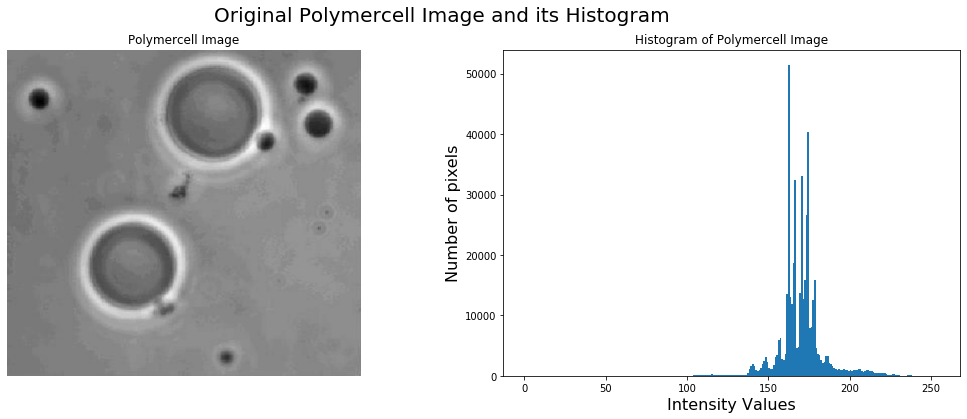

In [3]:
fig = plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
img=plt.imshow(I,cmap='gray')
plt.axis('off')
plt.title('Polymercell Image')
plt.subplot(1, 2, 2)
plt.hist(I.flatten(),bins=255,range=(0,255))
plt.title('Histogram of Polymercell Image')
plt.xlabel('Intensity Values', fontsize=16)
plt.ylabel('Number of pixels', fontsize=16)
fig.suptitle('Original Polymercell Image and its Histogram', fontsize = 20)
plt.show()

# <span style='font-family:"Times New Roman"'> Implementing the iterative global thresholding algorithm:

In [4]:
def iterative_global_threshold(I,delta_T):
    I_thresh = np.zeros(I.shape)
    delta_T = random.randint(np.min(I),np.max(I))
    T1 = 0
    while delta_T - T1 > 0.05:
        T1 = delta_T
        S1 = I[I>delta_T]
        S2 = I[I<= delta_T]
        m1 = np.mean(S1)
        m2 = np.mean(S2)
        delta_T = 0.5*(m1+m2)
    I_thresh[I >= delta_T] = 1
    I_thresh[I < delta_T] = 0
    return(I_thresh,delta_T)

In [5]:
I_thresh,T=iterative_global_threshold(I,0.05)

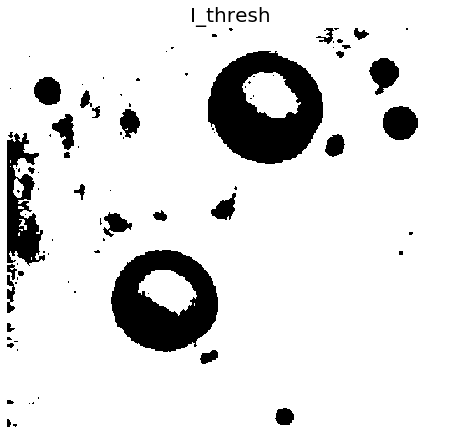

In [6]:
fig = plt.figure(figsize=(8, 8))
img=plt.imshow(I_thresh,cmap='gray')
plt.axis('off')
plt.title('I_thresh',fontsize=20)
plt.show()

In [7]:
print("Threshold calculated by iterative global thresholding algorithm:")
print(T)

Threshold calculated by iterative global thresholding algorithm:
160.75371472519058


 <span style='font-family:"Times New Roman"'>The calculated threshold by algorithm is different from calculated threshold in book. Hence, the results are significantly different. 

 <span style='font-family:"Times New Roman"'>In next section, I have inititatoed my T using mean value of image intensities instead of having a random number between minimum and maximum intensity of image to generate exact figure of the book. 

In [8]:
def iterative_global_thresholdmean(I,delta_T):
    I_thresh = np.zeros(I.shape)
    delta_T = np.mean(I)
    T1 = 0
    while delta_T - T1 > 0.05:
        T1 = delta_T
        S1 = I[I>delta_T]
        S2 = I[I<= delta_T]
        m1 = np.mean(S1)
        m2 = np.mean(S2)
        delta_T = 0.5*(m1+m2)
        print(delta_T)
    I_thresh[I >= delta_T] = 1
    I_thresh[I < delta_T] = 0
    return(I_thresh,delta_T)

In [9]:
I_thresh,T=iterative_global_thresholdmean(I,0.05)

169.39499746303449


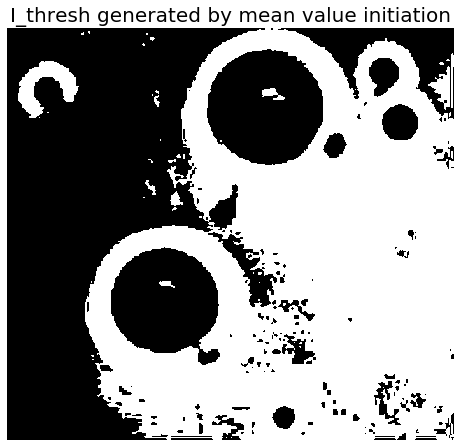

In [10]:
fig = plt.figure(figsize=(8, 8))
img=plt.imshow(I_thresh,cmap='gray')
plt.axis('off')
plt.title('I_thresh generated by mean value initiation',fontsize=20)
plt.show()

# <span style='font-family:"Times New Roman"'> Otsu threshold

In [11]:
T_otsu=filters.threshold_otsu(I)

In [12]:
result = I > T_otsu

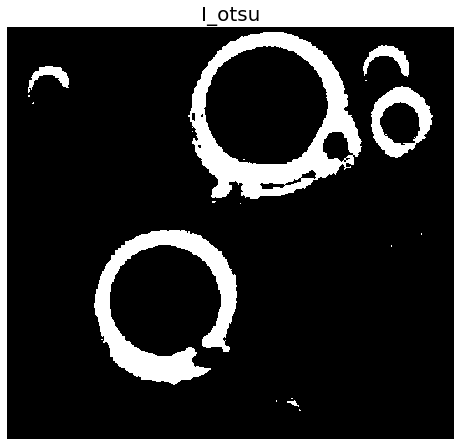

In [13]:
fig = plt.figure(figsize=(8, 8))
img=plt.imshow(result,cmap='gray')
plt.axis('off')
plt.title('I_otsu',fontsize=20)
plt.show()

In [14]:
print("Threshold calculated by Ostus method:")
print(T_otsu)

Threshold calculated by Ostus method:
181


<span style='font-family:"Times New Roman"'>The calculated Ostu threshold match the calculated threshold in book (181 and 182). Hence, the resulting images are similar too. 